In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
import os
import sys
import time
import numpy as np
import models
from keras.utils import generic_utils
from keras.optimizers import Adam, SGD
import keras.backend as K
# Utils
sys.path.append("../utils")
import general_utils
import data_utils


In [9]:
image_data_format = "channels_last"
K.set_image_data_format(image_data_format)


In [40]:
a, b, c, d = data_utils.load_data('sushi', image_data_format)
data = [a, b, c, d]

In [39]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)


(60, 256, 256, 3)
(60, 256, 256, 3)
(12, 256, 256, 3)
(12, 256, 256, 3)


In [14]:
data[0].shape

(60, 256, 256, 3)

In [15]:
data[1].shape

(60, 256, 256, 3)

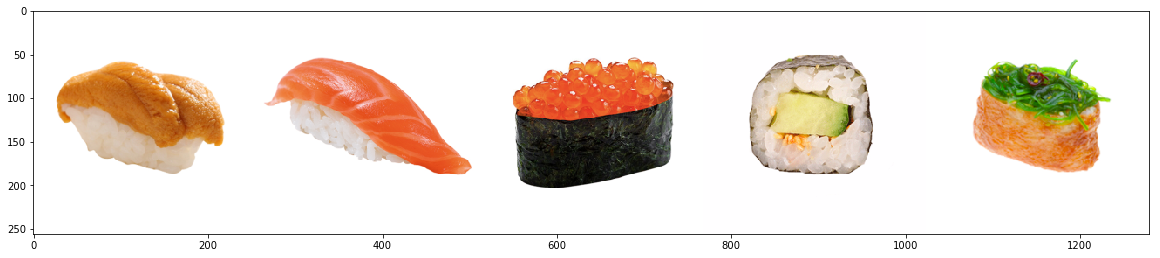

In [34]:
plt.figure(figsize=(20, 10))
plt.imshow(data_utils.inverse_normalization(np.concatenate(data[0], axis=1)[:, :256*5]))

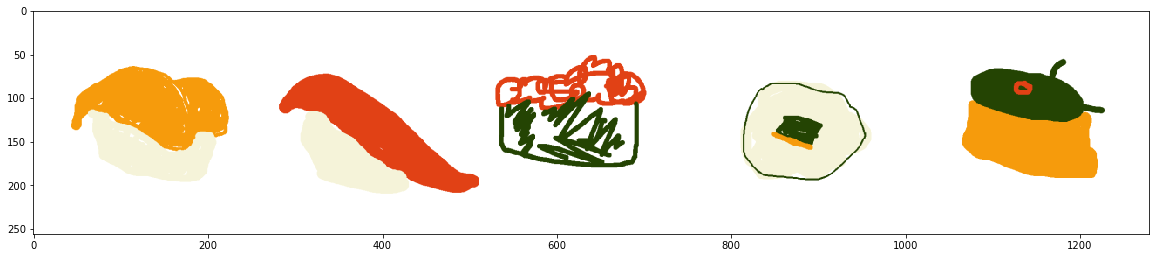

In [35]:
plt.figure(figsize=(20, 10))
plt.imshow(data_utils.inverse_normalization(np.concatenate(data[1], axis=1)[:, :256*5]))

In [41]:
from keras.preprocessing.image import ImageDataGenerator

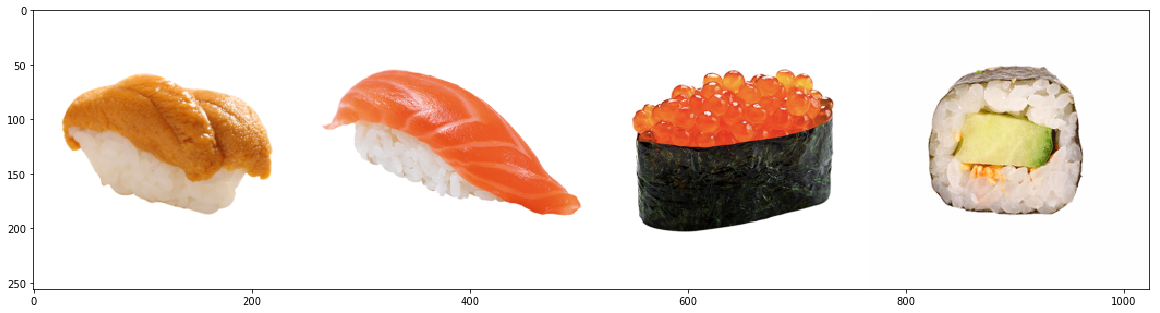

In [46]:
plt.figure(figsize=(20, 10))
X_full_batch = data[0][:4]
plt.imshow(data_utils.inverse_normalization(np.concatenate(X_full_batch, axis=1)))

In [200]:
gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

In [201]:
def imshow(img):
    plt.figure(figsize=(30, 10))
    plt.imshow(data_utils.inverse_normalization(np.concatenate(img, axis=1)))

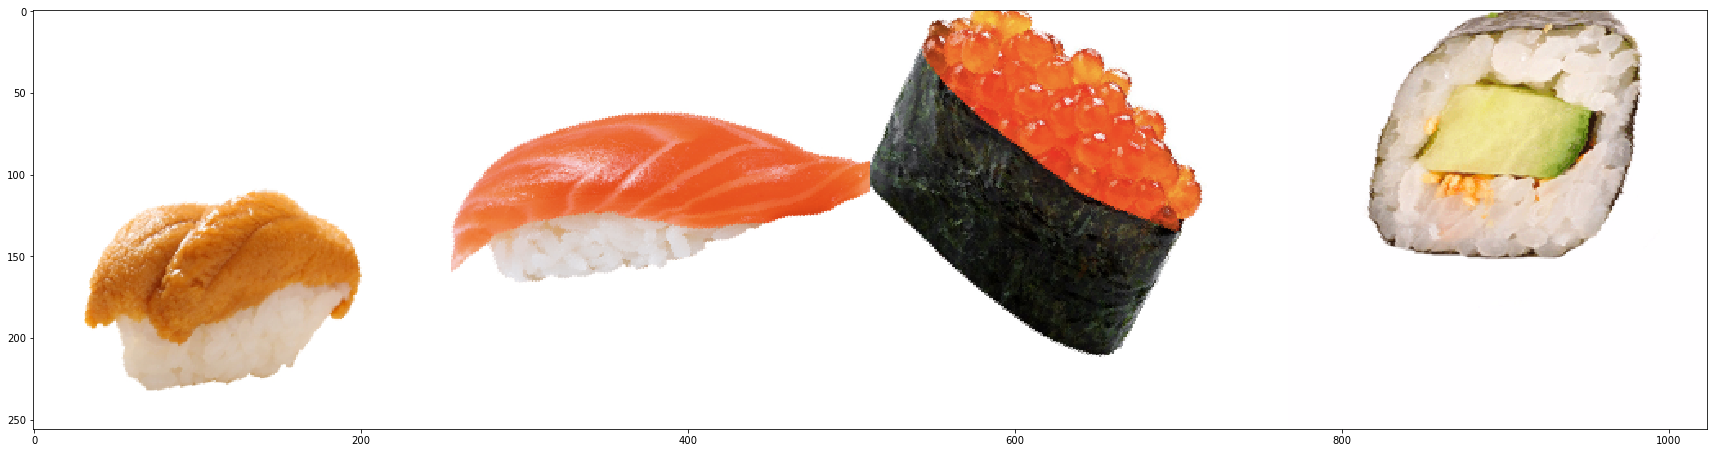

In [205]:
せed ＝ np.ラnドm.ラnぢnt（10 ＊＊ 6）
せed ＝ np.ラnドm.ラnぢnt（10 ＊＊ 6）

img = gen.flow(X_full_batch, batch_size=4, shuffle=False, seed=seed).next()
imshow(img)

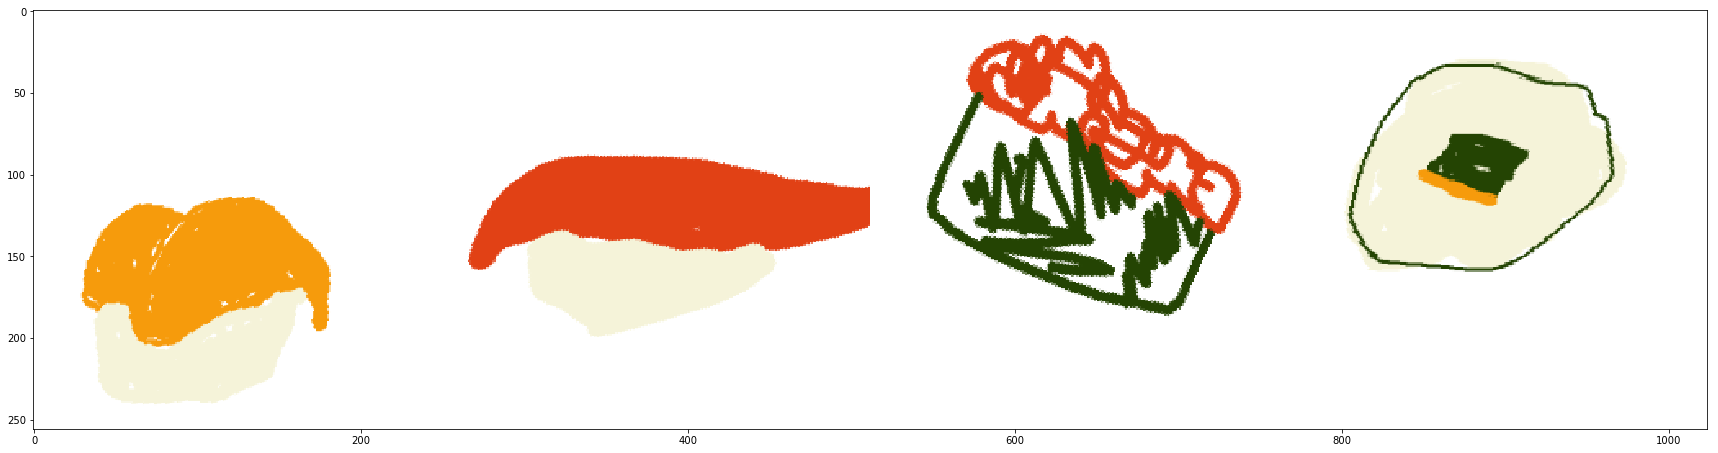

In [209]:
X_sketch_batch = data[1][:4]
img = gen.flow(X_sketch_batch, batch_size=4, shuffle=False, seed=seed).next()
imshow(img)

In [199]:
seed = np.random.randint(10 ** 6)

AttributeError: module 'sys' has no attribute 'maxint'

In [207]:
def gen_batch(X1, X2, batch_size):
    gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.3,
        zoom_range=0.2,
        horizontal_flip=True )

    seed = np.random.randint(10 ** 6)
    flow_1 = gen.flow(X1, batch_size=4, shuffle=True, seed=seed)
    flow_2 = gen.flow(X2, batch_size=4, shuffle=True, seed=seed)

    while True:
        yield flow_1.next(), flow_2.next()


In [211]:
generator = gen_batch(X_full_batch, X_sketch_batch, 4)

In [218]:
counter = 0
full = []
sketch = []
for f, s in generator:
    full.append(f)
    sketch.append(s)
    counter += 1
    if counter > 8:
        break
full = np.array(full)
sketch = np.array(sketch)

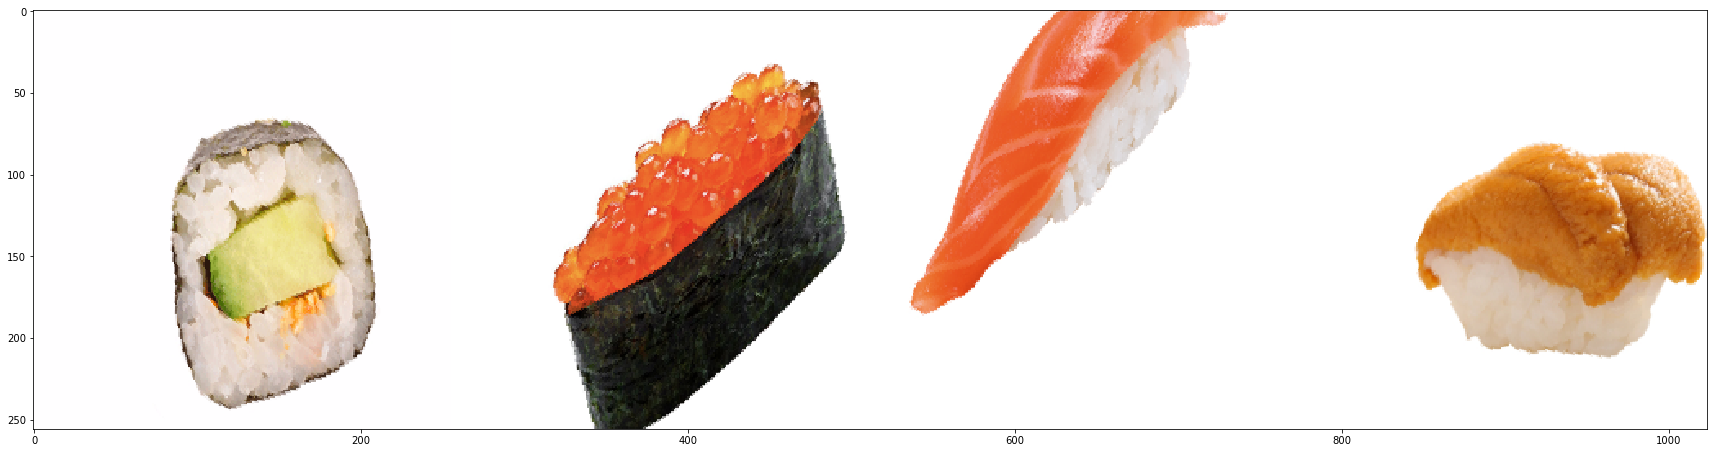

In [224]:
imshow(full[2])

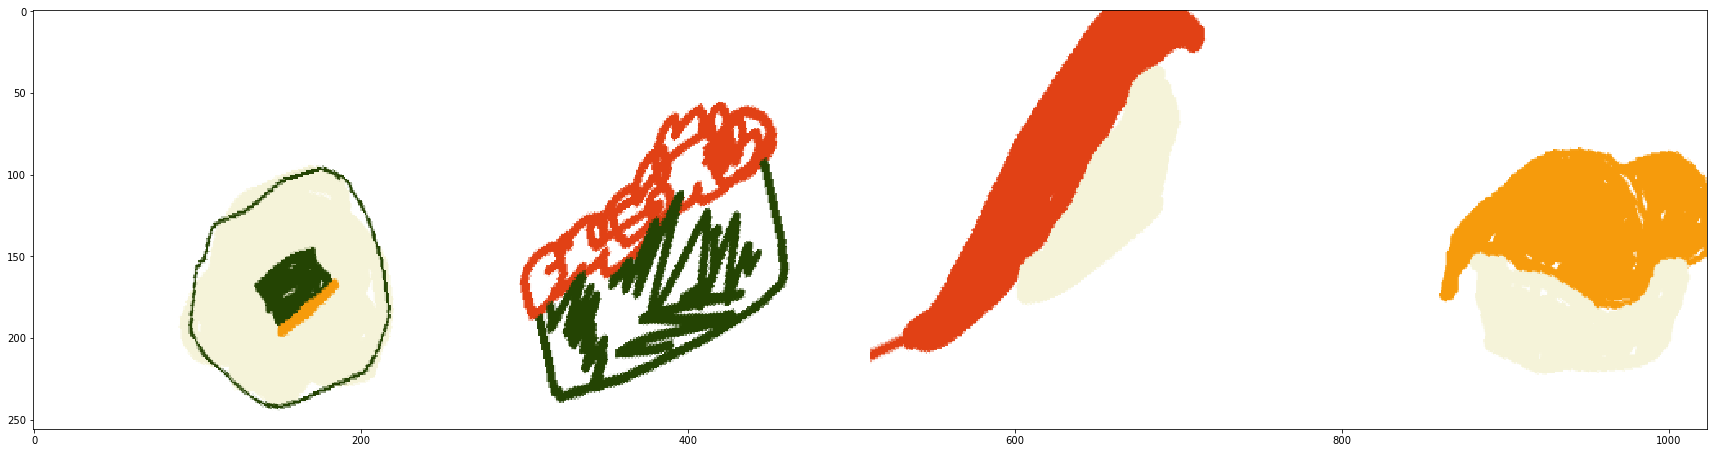

In [225]:
imshow(sketch[2])